
# Event distribution using kdeplot

This example shows how to plot the location of events occurring in a match
using kernel density estimation (KDE).


In [2]:
from urllib.request import urlopen

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import ax_text

from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen


Load the first game that Messi played as a false-9 and the match before.



In [3]:
parser = Sbopen()
df_false9 = parser.event(69249)[0]  # 0 index is the event file
df_before_false9 = parser.event(69251)[0]  # 0 index is the event file
# filter messi's actions (starting positions)
df_false9 = df_false9.loc[df_false9.player_id == 5503, ["x", "y"]]
df_before_false9 = df_before_false9.loc[df_before_false9.player_id == 5503, ["x", "y"]]


Create a custom colormap.
Note see the [custom colormaps](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_cmap.html)
example for more ideas.



In [4]:
flamingo_cmap = LinearSegmentedColormap.from_list(
    "Flamingo - 100 colors", ["#e3aca7", "#c03a1d"], N=100
)


Plot Messi's first game as a false-9.



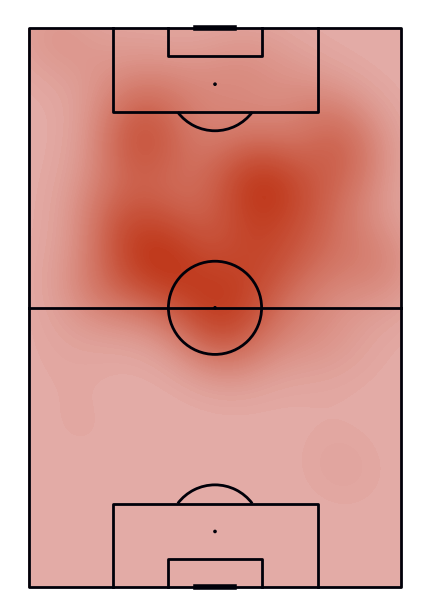

In [5]:
pitch = VerticalPitch(line_color="#000009", line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(
    df_false9.x,
    df_false9.y,
    ax=ax,
    # fill using 100 levels so it looks smooth
    fill=True,
    levels=100,
    # shade the lowest area so it looks smooth
    # so even if there are no events it gets some color
    thresh=0,
    cut=4,  # extended the cut so it reaches the bottom edge
    cmap=flamingo_cmap,
)


Load a custom font.



In [6]:
URL = "https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf"
URL2 = "https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf"
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)


Load images.



In [7]:
# Load the StatsBomb logo and Messi picture
MESSI_URL = (
    "https://upload.wikimedia.org/wikipedia/commons/b/b8/Messi_vs_Nigeria_2018.jpg"
)
messi_image = Image.open(urlopen(MESSI_URL))
SB_LOGO_URL = (
    "https://raw.githubusercontent.com/statsbomb/open-data/"
    "master/img/SB%20-%20Icon%20Lockup%20-%20Colour%20positive.png"
)
sb_logo = Image.open(urlopen(SB_LOGO_URL))


Plot the chart again with a title.
We will use mplsoccer's grid function to plot a pitch with a title and endnote axes.



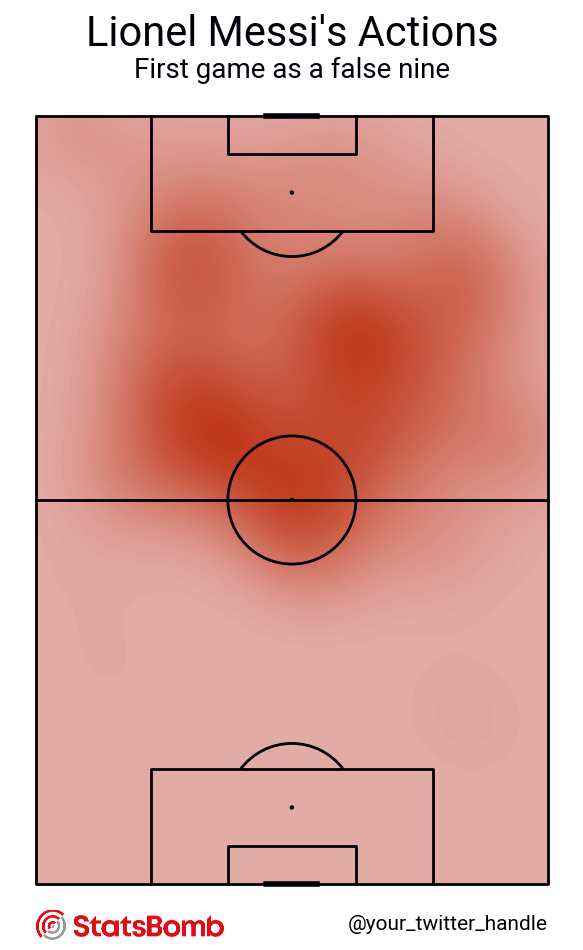

In [8]:
fig, axs = pitch.grid(
    figheight=10,
    title_height=0.08,
    endnote_space=0,
    title_space=0,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.82,
    endnote_height=0.03,
)
kde = pitch.kdeplot(
    df_false9.x,
    df_false9.y,
    ax=axs["pitch"],
    # fill using 100 levels so it looks smooth
    fill=True,
    levels=100,
    # shade the lowest area so it looks smooth
    # so even if there are no events it gets some color
    thresh=0,
    cut=4,  # extended the cut so it reaches the bottom edge
    cmap=flamingo_cmap,
)
axs["endnote"].text(
    1,
    0.5,
    "@your_twitter_handle",
    va="center",
    ha="right",
    fontsize=15,
    fontproperties=robotto_regular.prop,
)
axs["title"].text(
    0.5,
    0.7,
    "Lionel Messi's Actions",
    color="#000009",
    va="center",
    ha="center",
    fontproperties=robotto_regular.prop,
    fontsize=30,
)
axs["title"].text(
    0.5,
    0.25,
    "First game as a false nine",
    color="#000009",
    va="center",
    ha="center",
    fontproperties=robotto_regular.prop,
    fontsize=20,
)
ax_sb_logo = add_image(
    sb_logo,
    fig,
    # set the left, bottom and height to align with the endnote
    left=axs["endnote"].get_position().x0,
    bottom=axs["endnote"].get_position().y0,
    height=axs["endnote"].get_position().height,
)


Plot Messi's actions in the matches before and after becoming a false-9.
We will use mplsoccer's grid function, which is a convenient way to plot a grid
of pitches with a title and endnote axes.



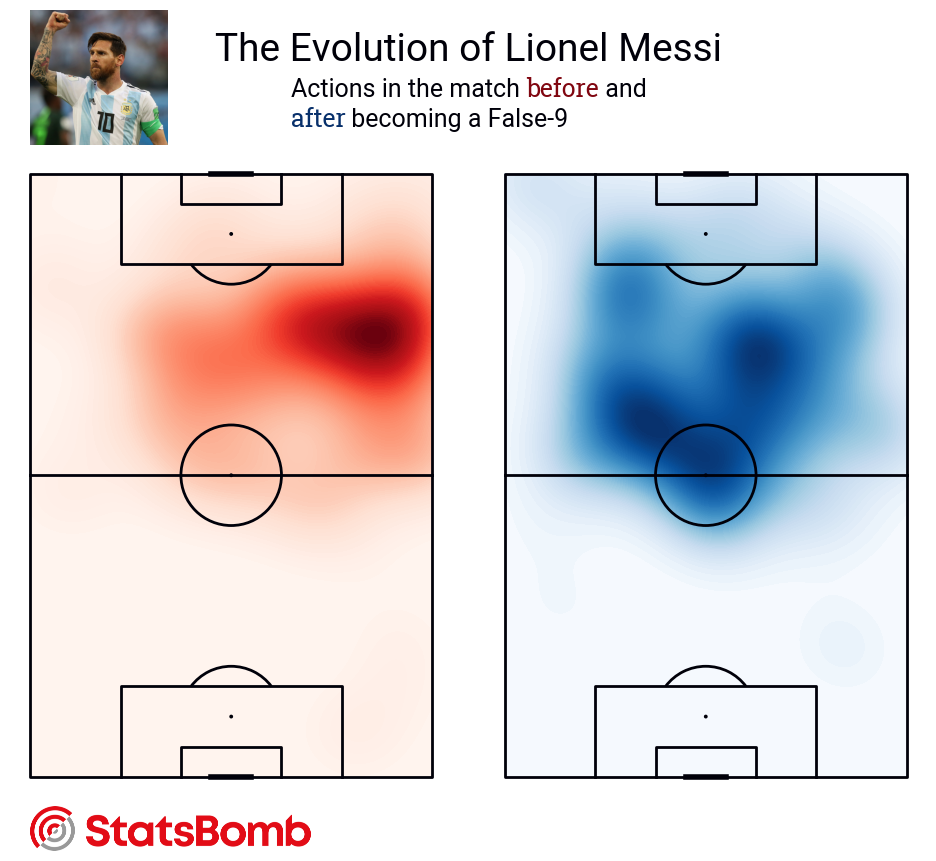

In [9]:
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)

kde_before = pitch.kdeplot(
    df_before_false9.x,
    df_before_false9.y,
    ax=axs["pitch"][0],
    fill=True,
    levels=100,
    thresh=0,
    cut=4,
    cmap="Reds",
)

kde_after = pitch.kdeplot(
    df_false9.x,
    df_false9.y,
    ax=axs["pitch"][1],
    fill=True,
    levels=100,
    thresh=0,
    cut=4,
    cmap="Blues",
)

ax_sb_logo = add_image(
    sb_logo,
    fig,
    # set the left, bottom and height to align with the endnote
    left=axs["endnote"].get_position().x0,
    bottom=axs["endnote"].get_position().y0,
    height=axs["endnote"].get_position().height,
)
ax_messi = add_image(
    messi_image,
    fig,
    interpolation="hanning",
    # set the left, bottom and height to align with the title
    left=axs["title"].get_position().x0,
    bottom=axs["title"].get_position().y0,
    height=axs["title"].get_position().height,
)

# titles using highlight_text and a google font (Robotto)

TITLE_STR1 = "The Evolution of Lionel Messi"
TITLE_STR2 = "Actions in the match <before> and\n<after> becoming a False-9"
title1_text = axs["title"].text(
    0.5,
    0.7,
    TITLE_STR1,
    fontsize=28,
    color="#000009",
    fontproperties=robotto_regular.prop,
    ha="center",
    va="center",
)
highlight_text = [
    {"color": "#800610", "fontproperties": robboto_bold.prop},
    {"color": "#08306b", "fontproperties": robboto_bold.prop},
]
ax_text(
    0.5,
    0.3,
    TITLE_STR2,
    ha="center",
    va="center",
    fontsize=18,
    color="#000009",
    fontproperties=robotto_regular.prop,
    highlight_textprops=highlight_text,
    ax=axs["title"],
)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_kde_003.png'

# Messi Photo from: https://en.wikipedia.org/wiki/Lionel_Messi#/media/File:Messi_vs_Nigeria_2018.jpg
# License: https://creativecommons.org/licenses/by-sa/3.0/;
# Creator: Кирилл Венедиктов

plt.show()  # If you are using a Jupyter notebook you do not need this line
